# Modelling the vertical resolution of IFS for n levels

In [1]:
using CSV
using DataFrames
using PyPlot
using LsqFit

In [2]:
L31 = CSV.read("L31_phalf_levels.txt",DataFrame)
L40 = CSV.read("L40_phalf_levels.txt",DataFrame)
L60 = CSV.read("L60_phalf_levels.txt",DataFrame)
L91 = CSV.read("L91_phalf_levels.txt",DataFrame)
L137 = CSV.read("L137_phalf_levels.txt",DataFrame);

In [3]:
p_half31 = Vector(Array(L31)[:,1])
p_half40 = Vector(Array(L40)[:,1])
p_half60 = Vector(Array(L60)[:,1])
p_half91 = Vector(Array(L91)[:,1])
p_half137 = Vector(Array(L137)[:,1]);

### Fit a generalised logistic function

$Y(x) = A + \frac{K - A}{(C + Q \exp(-B(x-M)))^{1/\nu}}$

In [4]:
# fit based on L?
p0 = 1013.25                       # surface pressure
y = p_half31/p0                    # dependent data
x = Vector(range(0,1,length(y)))   # independent data

# generalised logistic
p0 = Float64[0,1,1,1,1,0,1]

function model(x,p)
    A,K,C,Q,B,M,ν = p
    return @. A + (K-A)/(C+Q*exp(-B*(x-M)))^(1/ν)
end

fit = curve_fit(model,x,y,p0)
pfit = coef(fit)
x = range(0,1,9)
yfit = model(x,Float16.(pfit))
Float16.(pfit)   # round for shorter inclusion in the default parameters

7-element Vector{Float16}:
 -0.2827
  0.871
  0.4136
  6.695
 10.336
  0.602
  5.812

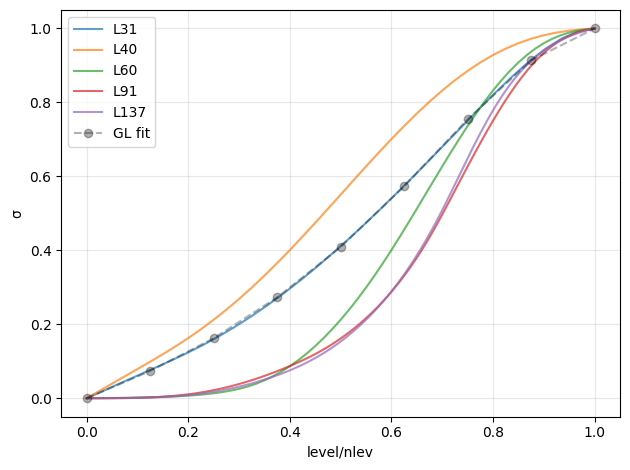

┌ Warning: `vendor()` is deprecated, use `BLAS.get_config()` and inspect the output instead
│   caller = npyinitialize() at numpy.jl:67
└ @ PyCall /Users/milan/.julia/packages/PyCall/3fwVL/src/numpy.jl:67


In [5]:
for (p,t) in zip([p_half31,p_half40,p_half60,p_half91,p_half137],
                    ["L31","L40","L60","L91","L137"])
    plot(range(0,1,length(p)),p/p[end],label=t,alpha=.7)
end

yfit[1] = 0
yfit[end] = 1

plot(x,yfit,"ko--",label="GL fit",alpha=.3)

xlabel("level/nlev")
ylabel("σ")
grid(alpha=.3)

legend()
tight_layout()

In [10]:
# new default levels become
hcat(yfit,[0.0, 0.05, 0.14, 0.26, 0.42, 0.6, 0.77, 0.9, 1.0])

9×2 Matrix{Float64}:
 0.0       0.0
 0.073686  0.05
 0.162284  0.14
 0.272612  0.26
 0.408969  0.42
 0.573089  0.6
 0.75429   0.77
 0.913631  0.9
 1.0       1.0